# Центральная предельная теорема своими руками

## Я выберу равномерное случайное распределение на отрезке [a, b]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Генерация выборки

In [2]:
a = -3
b = 7

#сгенерируем равномерную случайную величину на отрезке [-3, 7]
uniform_rv = sts.uniform(a, b-a)

#сгенерируем 1000 значений из этой случайной величины
sample_array = uniform_rv.rvs(1000)

### Построение гистограммы распределения и теоретической плотности распределения

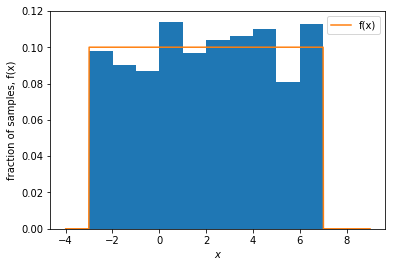

In [21]:
#построение гистограммы
plt.hist(sample_array, bins=10, normed=True)
plt.ylabel('fraction of samples, f(x)')
plt.xlabel('$x$')

#построение плотности распределения
x = np.linspace(a - 1,b + 2,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf, label='f(x)')
plt.legend()

### Оценка распределения выборочного среднего

In [4]:
#напишем функцию, которая генерирует m выборок объёма n. Затем составляет список объёма m из выборочных средних
def get_sample_mean_list(sample_array, n, m):
    return [np.mean(np.random.choice(sample_array, n)) for i in xrange(1, m + 1)]

# в функции:
# np.random.choice(sample_array, n) - генерирует список размера n из элементов списка sample_array, выбранных случайно
# np.mean(...) - находит выборочное среднее из выборки
# [... for i in xrange(1, m + 1)] - получение списка объёма m из выборочных средних

#### Найдём среднее, дисперсию и стандартное отклонение для равномерного случайного распределения на отрезке. А также найдём дисперсию и стандарное отклонение, что бы воспользоваться ЦПТ

In [15]:
s_mean = np.mean(sample_array)

#дисперсия находится как ((b - a)**2)/12. По ЦПТ для каждой оценки дисперсию необходимо делить на n. В нашем случае, это числа 5, 10, 50
s_disp = ((b - a) ** 2.)/12.
s_disp_1 = s_disp/5.
s_disp_2 = s_disp/10.
s_disp_3 = s_disp/50.
#стандартное отклонение находится как корень из дисперсии
s_std = s_disp ** (1./2.)
s_std_1 = s_disp_1 ** (1./2.)
s_std_2 = s_disp_2 ** (1./2.)
s_std_3 = s_disp_3 ** (1./2.)
print 'Среднее: ', s_mean
print 'Дисперсия:', s_disp
print 'Стандартное отклонение:', s_std

Среднее:  2.07331956837
Дисперсия: 8.33333333333
Стандартное отклонение: 2.88675134595


#### Оценка для n = 5

In [6]:
# зададим нормально распределенную случайную величину c найденным средним и стандартным отклонением
norm_rv_1 = sts.norm(loc=s_mean, scale=s_std_1)
                   
#найдём плотность распределения нормального распределения на отрезке [a, b]
x_1 = np.linspace(a, b, 1000)
pdf_1 = norm_rv_1.pdf(x_1)

In [7]:
#оценим выборочное среднее случайной величины для выборок объёма 5
sample_mean_1 = get_sample_mean_list(sample_array, 5, 1000)

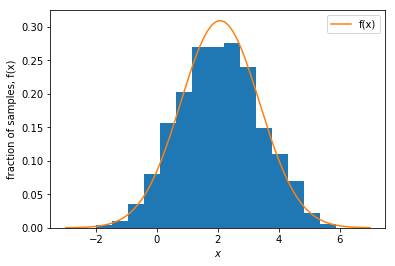

In [30]:
#построение гистограммы и плотности распределения нормального распределения
plt.hist(sample_mean_1, bins=15, normed=True)
plt.plot(x_1, pdf_1, label='f(x)')
plt.ylabel('fraction of samples, f(x)')
plt.xlabel('$x$')
plt.legend()

#### Оценка для n = 10

In [9]:
# зададим нормально распределенную случайную величину c найденным средним и стандартным отклонением
norm_rv_2 = sts.norm(loc=s_mean, scale=s_std_2)
                   
#найдём плотность распределения нормального распределения на отрезке [a, b]
x_2 = np.linspace(a, b, 1000)
pdf_2 = norm_rv_2.pdf(x_2)

In [10]:
#оценим выборочное среднее случайной величины для выборок объёма 10
sample_mean_2 = get_sample_mean_list(sample_array, 10, 1000)

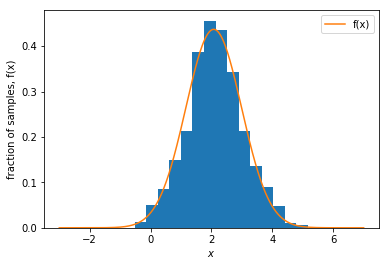

In [29]:
#построение гистограммы и плотности распределения нормального распределения
plt.hist(sample_mean_2, bins=15, normed=True)
plt.plot(x_2, pdf_2, label='f(x)')
plt.ylabel('fraction of samples, f(x)')
plt.xlabel('$x$')
plt.legend()

#### Оценка для n = 50

In [12]:
# зададим нормально распределенную случайную величину c найденным средним и 
norm_rv_3 = sts.norm(loc=s_mean, scale=s_std_3)
                   
#найдём плотность распределения нормального распределения на отрезке [a, b]
x_3 = np.linspace(a, b, 1000)
pdf_3 = norm_rv_3.pdf(x_3)

In [13]:
#оценим выборочное среднее случайной величины для выборок объёма 50
sample_mean_3 = get_sample_mean_list(sample_array, 50, 1000)

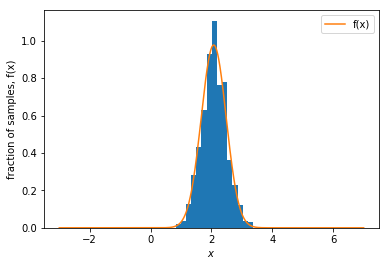

In [28]:
#построение гистограммы и плотности распределения нормального распределения
plt.hist(sample_mean_3, bins=15, normed=True)
plt.plot(x_3, pdf_3, label='f(x)')
plt.ylabel('fraction of samples, f(x)')
plt.xlabel('$x$')
plt.legend()

## Вывод: С ростом n гистограмма становится более узкой и более сконцентрированной возле среднего значения. С ростом n точность аппроксимации распределения выборочных средних нормальным растёт. 